# Quels sont les déterminants d’une commande à risque sur Amazon, et comment un modèle de machine learning peut-il permettre de prédire les annulations afin d’optimiser la logistique et la satisfaction client ?

## Préparation de la variable cible

In [78]:
pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd

In [80]:
df = pd.read_csv('Amazon Sale Report.csv')

/var/folders/lj/8ml3hddd2hs_pgpwyfwl_y6r0000gn/T/ipykernel_5856/2474663059.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


In [81]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [82]:
print(df.columns.tolist())

['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']


In [83]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [85]:
variables_cles = ['Amount', 'Status', 'Order ID']
df = df.dropna(subset=variables_cles)

In [86]:
def simplify_status(status):
    failed_statuses = [
        'Cancelled',
        'Shipped - Returned to Seller',
        'Shipped - Rejected by Buyer',
        'Shipped - Lost in Transit',
        'Shipped - Returning to Seller',
        'Shipped - Damaged'
    ]
    return 1 if status in failed_statuses else 0

df['cancellation_risk'] = df['Status'].apply(simplify_status)


/var/folders/lj/8ml3hddd2hs_pgpwyfwl_y6r0000gn/T/ipykernel_5856/2122486053.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cancellation_risk'] = df['Status'].apply(simplify_status)


In [87]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,cancellation_risk
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,1
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,0
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,0
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,1
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False,0
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,0
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False,0
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False,0


In [88]:
variables = ['Category', 'ship-state', 'ship-service-level', 'fulfilled-by']

summary_tables = {}

for var in variables:
    summary = df.groupby(var)['cancellation_risk'].agg(['count', 'mean']).reset_index()
    summary.columns = [var, 'Nombre de commandes', 'Taux de risque']
    summary = summary.sort_values('Taux de risque', ascending=False)
    summary_tables[var] = summary

# Affichage des résultats
for var, table in summary_tables.items():
    print(f"\nAnalyse de la variable : {var}\n")
    print(table.head(10))


Analyse de la variable : Category

        Category  Nombre de commandes  Taux de risque
7  Western Dress                14704        0.114187
1         Bottom                  420        0.111905
5            Set                47042        0.107245
8          kurta                46717        0.105936
0         Blouse                  881        0.098751
6            Top                10165        0.094638
3   Ethnic Dress                 1093        0.087832
4          Saree                  155        0.083871
2        Dupatta                    3        0.000000

Analyse de la variable : ship-state

            ship-state  Nombre de commandes  Taux de risque
32           Meghalaya                    2        1.000000
51           Rajshthan                    2        0.500000
5    Arunachal Pradesh                    3        0.333333
39              Odisha                   20        0.250000
25         LAKSHADWEEP                    4        0.250000
30             MIZORAM    

In [20]:
df['cancellation_risk'].value_counts(normalize=True) * 100

cancellation_risk
0    84.14654
1    15.85346
Name: proportion, dtype: float64

La classe majoritaire (0) domine très nettement, ce qui est courant dans les datasets liés à la détection de fraudes ou d’échecs.

Cela reflète probablement une réalité métier : la plupart des commandes se passent bien.

⚠️ Points à surveiller :

Déséquilibre de classes : 16 % de classe minoritaire, ce n’est pas extrême, mais ça peut poser problème en machine learning. Un modèle naïf pourrait prédire « toujours 0 » et avoir une bonne accuracy, tout en étant inutile.

Il faudra donc :

utiliser des métriques adaptées comme le F1-score, recall, ou precision (et pas juste la précision globale),

envisager un rééchantillonnage (oversampling de la classe 1, undersampling de la classe 0, ou SMOTE),

tester des modèles robustes aux déséquilibres (comme XGBoost avec scale_pos_weight).

### Rééchantillonage

In [21]:
df_majority = df[df['cancellation_risk'] == 0]
df_minority = df[df['cancellation_risk'] == 1]

Undersampling de la majorité (réduire les 0)

In [24]:
from sklearn.utils import resample

df_majority_downsampled = resample(df_majority,
                                   replace=False,   # sans duplication
                                   n_samples=len(df_minority),  # même taille que la classe 1
                                   random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

Oversampling de la minorité (augmenter les 1)

In [25]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,      # avec duplication
                                 n_samples=len(df_majority),  # même taille que la classe 0
                                 random_state=42)

df_balanced = pd.concat([df_majority, df_minority_upsampled])

Vérifier la nouvelle répartition

In [26]:
df_balanced['cancellation_risk'].value_counts(normalize=True) * 100

cancellation_risk
0    50.0
1    50.0
Name: proportion, dtype: float64

### Prétraitement des données

| Variable            | Description                                                      | Pertinence                                                                 |
|---------------------|------------------------------------------------------------------|----------------------------------------------------------------------------|
| Sales Channel       | Plateforme d'achat de la commande (Amazon, vendeur tiers…).     | Influence sur la fiabilité du traitement de commande.                     |
| ship-service-level  | Niveau de service de livraison (Standard, Expedited…).          | Peut impacter le taux de réussite ou de retour.                           |
| Category            | Catégorie de produit (kurta, top, dress…).                      | Certaines catégories sont plus sujettes aux annulations.                 |
| Amount              | Montant de la commande en roupies (INR).                        | Les extrêmes de prix peuvent refléter un risque différent.               |
| ship-state          | État/région de livraison en Inde.                               | Comportement d'achat et logistique varient selon la région.              |
| B2B                 | Commande B2B (True) ou B2C (False).                              | B2B a des comportements distincts du B2C.                                |
| fulfilled-by        | Entité responsable de la livraison (Amazon, vendeur…).          | Le prestataire impacte la qualité de la livraison.                       |


In [30]:
features = [
    'Sales Channel ',
    'ship-service-level',
    'Category',
    'Amount',
    'ship-state',
    'B2B',
    'fulfilled-by'
]
X = df_balanced[features]
y = df_balanced['cancellation_risk']

### Encodage des variables catégorielles 
Transformer des valeurs textuelles (qualitatives) en valeurs numériques exploitables par le modèle, sans perdre d'informat

In [31]:
from sklearn.preprocessing import LabelEncoder #LabelEncoder outil qui transforme du texte en nombres entiers

X = X.copy() #crée une copie de X pour éviter de modifier l’original directement
for col in X.select_dtypes(include='object').columns: #On parcourt toutes les colonnes de type texte (object) dans X
    le = LabelEncoder() #Pour chaque colonne texte, on crée un encodeur LabelEncoder
    X[col] = le.fit_transform(X[col].astype(str)) #le.fit_transform(...) : transforme les valeurs texte → nombres entiers uniques. astype(str) : s’assure que toutes les valeurs sont bien des chaînes de caractères (même s’il y a des NaN)

## Modèle Random Forest

### Séparation train/test

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entraînement du modèle

Random Forest, c’est plein de petits arbres qui posent chacun leurs questions, et à la fin ils votent tous ensemble pour dire si la commande est à risque ou non. Pendant l'entraînement, Random Forest apprend à reconnaître les schémas qui mènent à une annulation.
Pendant le test, il reconnaît ces schémas dans des commandes jamais vues, et prédit si elles sont à risque ou non.

In [33]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Évaluation du modèle

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19296  2392]
 [ 4621 17103]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     21688
           1       0.88      0.79      0.83     21724

    accuracy                           0.84     43412
   macro avg       0.84      0.84      0.84     43412
weighted avg       0.84      0.84      0.84     43412



| Classe | Précision | Rappel | F1-score | Interprétation                                               |
|--------|-----------|--------|----------|---------------------------------------------------------------|
| 0      | 0.81      | 0.89   | 0.85     | Peu de faux positifs, le modèle détecte bien les non-risques |
| 1      | 0.88      | 0.79   | 0.83     | Très précis, mais rate encore 21 % des vraies commandes à risque |
| Global | 0.84      | 0.84   | 0.84     | Bon équilibre entre les deux classes                         |


| Ligne            | Score | Signification                                                                                   |
|------------------|-------|-----------------------------------------------------------------------------------------------|
| accuracy         | 0.84  | Pourcentage global de bonnes prédictions, toutes classes confondues.                         |
| macro avg        | 0.84  | Moyenne **non pondérée** des scores de chaque classe. Évalue chaque classe de façon égale.   |
| weighted avg     | 0.84  | Moyenne **pondérée** par le nombre d’exemples dans chaque classe. Représente mieux la réalité quand les classes sont déséquilibrées. |


### Interprétation des résultats

In [35]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


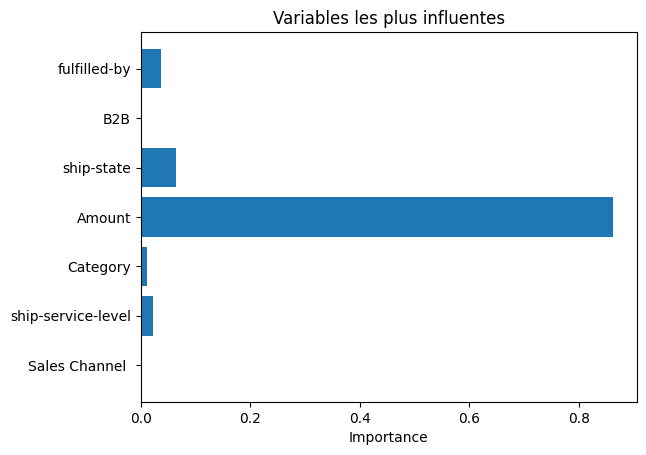

In [36]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X.columns
plt.barh(feat_names, importances)
plt.xlabel("Importance")
plt.title("Variables les plus influentes")
plt.show()

→ Cela signifie que le montant de la commande a un impact très fort sur le risque d’annulation. Peut-être que les petites commandes ou très grosses commandes sont plus souvent annulées.

In [37]:
df['montant_bin'] = pd.cut(df['Amount'], bins=[0, 200, 500, 1000, 2000, df['Amount'].max()],
                           labels=['Très petit', 'Petit', 'Moyen', 'Grand', 'Très grand'])

In [38]:
taux_annulation = df.groupby('montant_bin')['cancellation_risk'].mean().reset_index()
taux_annulation.columns = ['Tranche de montant', 'Taux d’annulation']
print(taux_annulation)

  Tranche de montant  Taux d’annulation
0         Très petit           0.000000
1              Petit           0.110826
2              Moyen           0.108438
3              Grand           0.096174
4         Très grand           0.129630


/var/folders/lj/8ml3hddd2hs_pgpwyfwl_y6r0000gn/T/ipykernel_5856/1613598751.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taux_annulation = df.groupby('montant_bin')['cancellation_risk'].mean().reset_index()


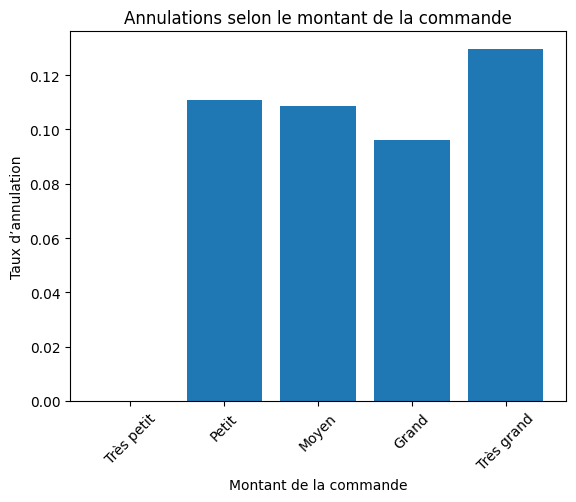

In [39]:
import matplotlib.pyplot as plt

plt.bar(taux_annulation['Tranche de montant'], taux_annulation['Taux d’annulation'])
plt.xlabel('Montant de la commande')
plt.ylabel('Taux d’annulation')
plt.title('Annulations selon le montant de la commande')
plt.xticks(rotation=45)
plt.show()

L’analyse montre que les commandes de très grande valeur sont les plus à risque d’annulation (taux > 13 %), probablement en raison d'une plus grande hésitation d’achat ou d’un risque logistique plus élevé.
Les commandes de montant moyen à grand présentent un risque plus faible, ce qui peut refléter une zone de confiance des consommateurs.

L’analyse montre que les commandes de très grande valeur sont les plus à risque d’annulation (taux > 13 %), probablement en raison d'une plus grande hésitation d’achat ou d’un risque logistique plus élevé.
Les commandes de montant moyen à grand présentent un risque plus faible, ce qui peut refléter une zone de confiance des consommateurs.

## Comapraison avec XG Boost

In [40]:
pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
y_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_proba > 0.35).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[16025  5663]
 [ 5352 16372]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74     21688
           1       0.74      0.75      0.75     21724

    accuracy                           0.75     43412
   macro avg       0.75      0.75      0.75     43412
weighted avg       0.75      0.75      0.75     43412



AUC: 0.842


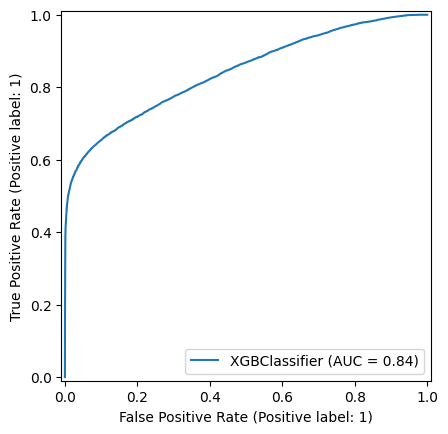

In [45]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba = xgb_model.predict_proba(X_test)[:, 1]
print(f"AUC: {roc_auc_score(y_test, y_proba):.3f}")

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)

## Amélioration de la précision de Random Forest

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [48]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced', None]
}

In [49]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='precision',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='precision', verbose=2)

In [51]:
best_rf = grid_search.best_estimator_

In [52]:
y_proba = best_rf.predict_proba(X_test)[:, 1]

In [53]:
y_pred_thresh = (y_proba > 0.55).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[20399  1289]
 [ 6765 14959]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.84     21688
           1       0.92      0.69      0.79     21724

    accuracy                           0.81     43412
   macro avg       0.84      0.81      0.81     43412
weighted avg       0.84      0.81      0.81     43412

[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.7s
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   9.9s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   7.9s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.4s
[CV] END class_weight=

/var/folders/lj/8ml3hddd2hs_pgpwyfwl_y6r0000gn/T/ipykernel_5856/3900584420.py:30: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/yasmine/Desktop/mémoire/env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


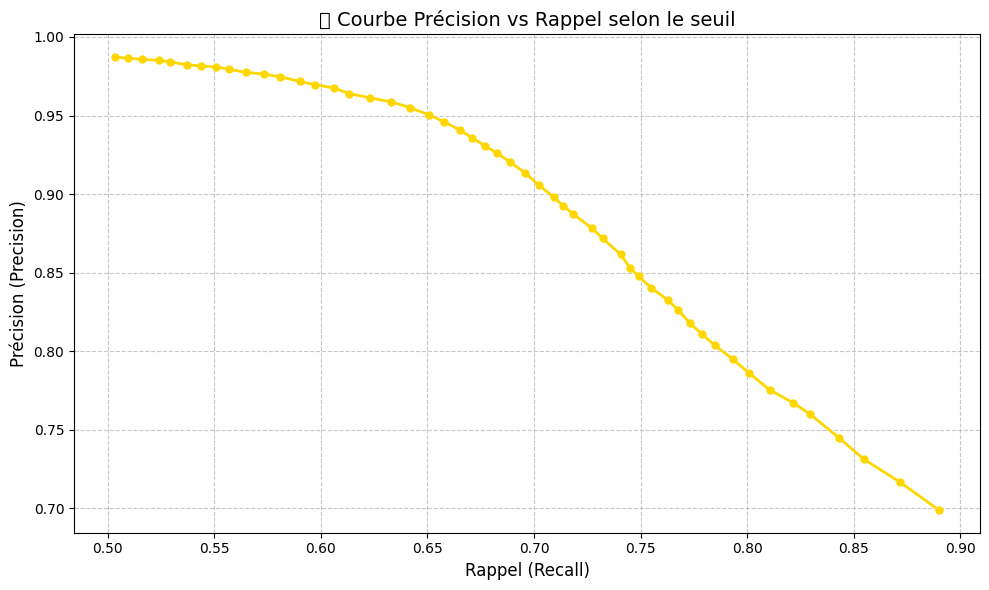

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Seuils à tester
seuils = np.arange(0.3, 0.81, 0.01)

# Listes pour stocker précision et rappel
precisions = []
recalls = []

# Assure-toi d’avoir exécuté ça avant :
# y_proba = best_rf.predict_proba(X_test)[:, 1]
# y_test = tes vraies valeurs (labels)

for seuil in seuils:
    y_pred = (y_proba > seuil).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# 🌟 Tracer la courbe avec style jaune
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, marker='o', color='gold', linewidth=2, markersize=5)
plt.xlabel('Rappel (Recall)', fontsize=12)
plt.ylabel('Précision (Precision)', fontsize=12)
plt.title('💡 Courbe Précision vs Rappel selon le seuil', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()